In [69]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 8]
import cv2
import numpy as np


In [70]:
def imshow(image):
    if (len(image.shape)==2):
        plt.imshow(image,cmap="gray")
    else:
        plt.imshow(image[:,:,::-1])
def resize(img, ratio):
    width = int(img.shape[1] * ratio)
    height = int(img.shape[0] * ratio)
    dim = (width, height)
    return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)


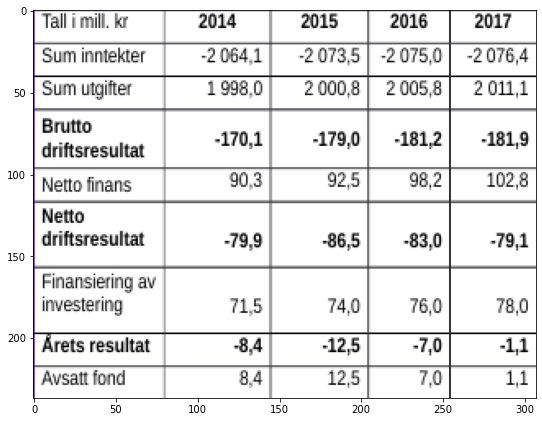

In [71]:
image = cv2.imread('train/32.png')
result = image.copy()
imshow(result)

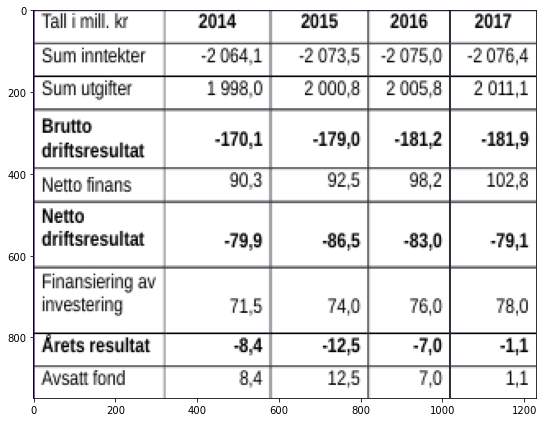

In [72]:

  
result = resize(result, 4)
# result=cv2.pyrUp(result)
# result=cv2.pyrUp(result)
imshow(result)

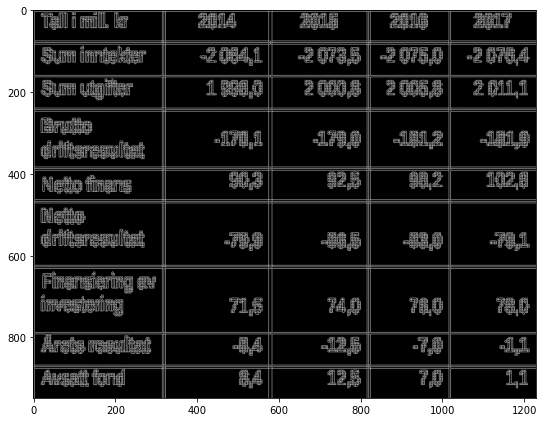

In [73]:

gray = cv2.cvtColor(result,cv2.COLOR_BGR2GRAY)   

canny = cv2.Canny(gray, 10, 50)
cannyres = canny.copy()
imshow(canny)

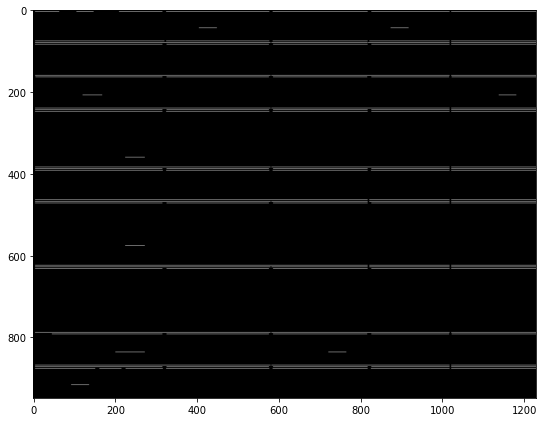

In [74]:
# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(cannyres, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
imshow(remove_horizontal)


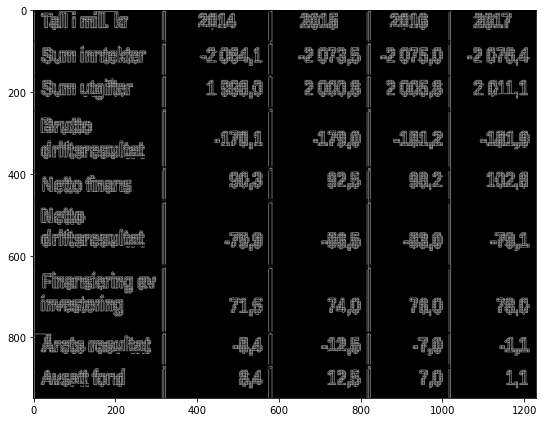

In [75]:

cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(canny, [c], -1, (0,0,0), 2)
imshow(canny)

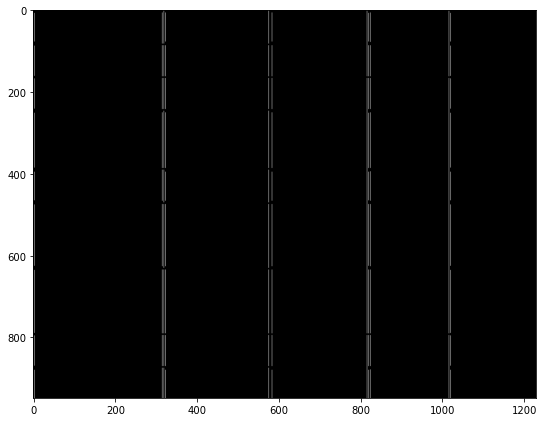

In [76]:
# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,28))
remove_vertical = cv2.morphologyEx(cannyres, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
imshow(remove_vertical)


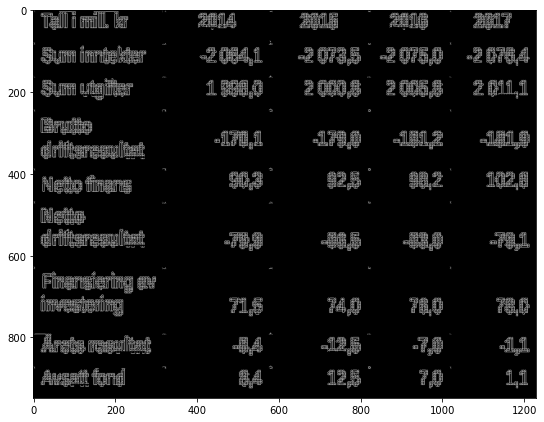

In [77]:
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(canny, [c], -1, (0,0,0), 4)
imshow(canny)

In [78]:
#canny = cv2.GaussianBlur(canny, (3,3),15)
# imshow(canny)



In [79]:
#thresh = cv2.threshold(canny, 0, 255, cv2.THRESH_OTSU)[1]
#imshow(thresh)

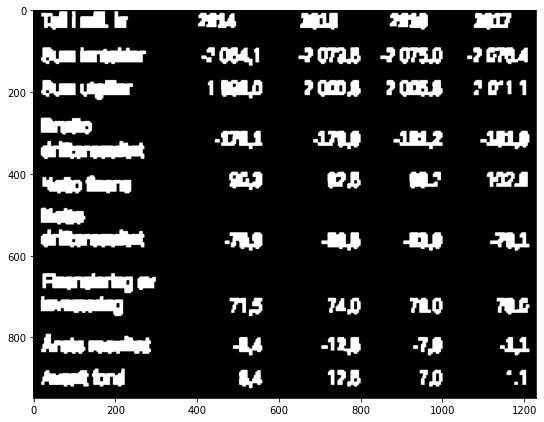

In [80]:

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# connected = cv2.dilate(thresh, kernel2, iterations=1)
connected = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
opening = cv2.morphologyEx(connected, cv2.MORPH_OPEN, kernel)
imshow(opening)
# connected = opening.copy()


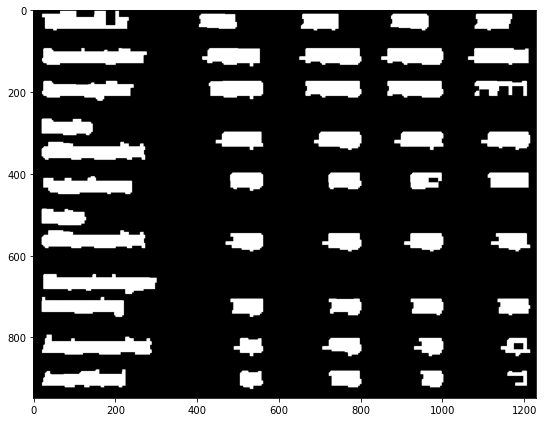

In [81]:
connected = opening.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12, 6))
connected = cv2.dilate(connected, kernel, iterations=2)
connected = cv2.erode(connected, kernel, iterations=2)
imshow(connected)


(237, 307, 3)


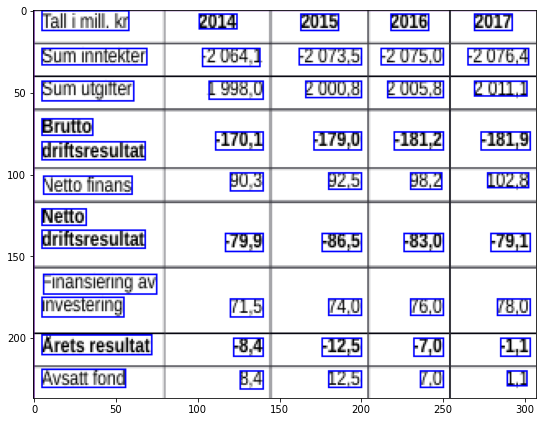

In [82]:
connected = resize(connected, 1/4)
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

mask = np.zeros(connected.shape, dtype=np.uint8)

image1 = image.copy()
print(image1.shape)
for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
    
    if r > 0.45 and w > 4 and h > 4:
        cv2.rectangle(image1, (x, y), (x+w-1, y+h-1), (255, 0, 0), 1)

imshow(image1)